# 10 Visualizing Spatial Data with PyVista

Spatial Data can be displayed using the PyVista package. This includes point data, line data and rasters. 

<img src="../images/tutorial10_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/10_visualizing_data_with_pyvista/'

## Visualizing Contour Lines with PyVista

### Loading Data

The contour lines are loaded as Shapely LineStrings within a GeoDataFrame. 

In [2]:
import pyvista as pv
import geopandas as gpd
import gemgis as gg

contours = gpd.read_file(file_path + 'topo.shp')
contours.head()

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


### Plotting Data

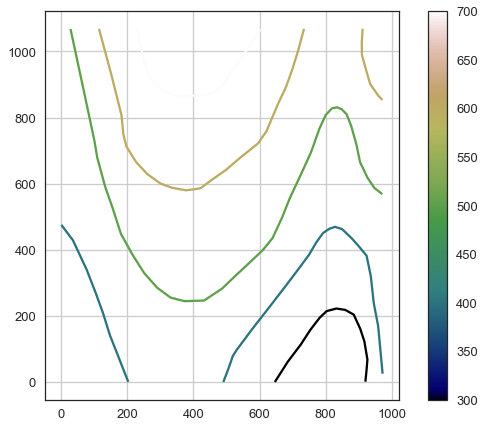

In [3]:
import matplotlib.pyplot as plt

contours.plot(aspect='equal', column='Z', cmap='gist_earth', legend=True)
plt.grid()

### Extracting the vertices of the contour lines for the plotting with PyVista

In [4]:
lines = gg.visualization.create_lines_3d(gdf=contours)

In [5]:
type(lines)

pyvista.core.pointset.PolyData

### Plotting the Lines with PyVista

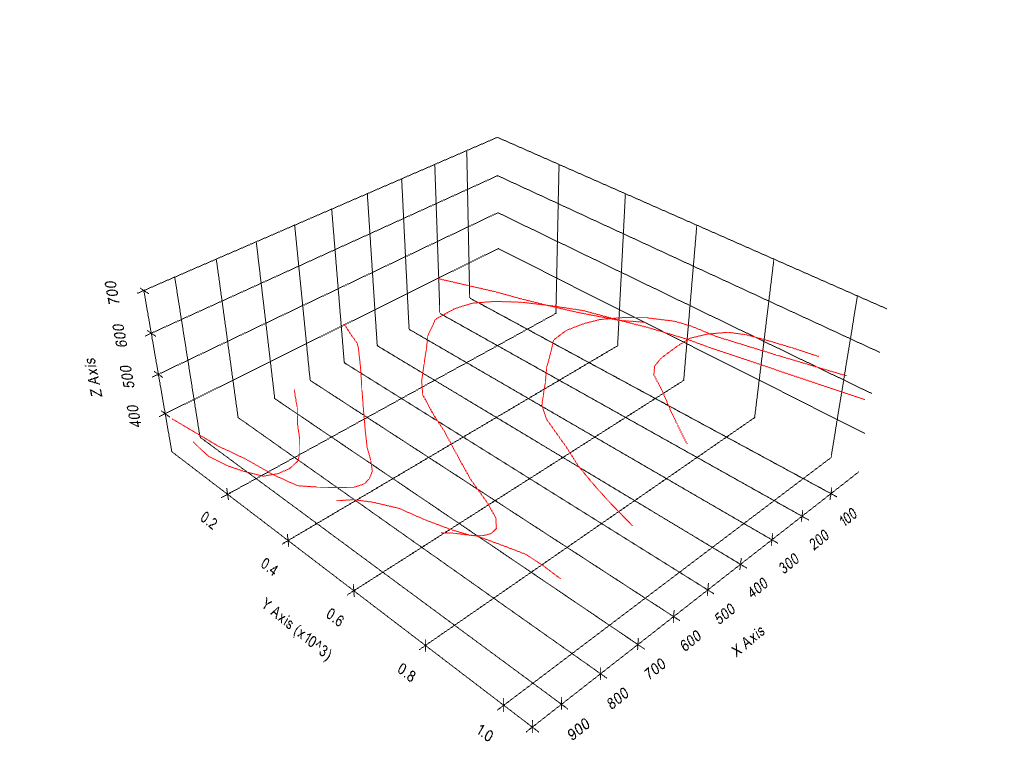

In [6]:
p = pv.Plotter()

p.add_mesh(mesh=lines, color='red')
    
p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Visualizing Points with PyVista

### Load Data

The points are loaded as Shapely Points within a GeoDataFrame.

In [7]:
import pyvista as pv
import geopandas as gpd
import gemgis as gg

points = gpd.read_file(file_path + 'interfaces_points.shp')
points.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


### Loading DEM and extract Z values

In order to plot the points at the correct Z-position, the values have to be extracted from a DEM

In [8]:
import rasterio

dem = rasterio.open(file_path + 'topo.tif')

points_xyz = gg.vector.extract_xyz(gdf=points, 
                                   dem=dem)

### Plotting Data

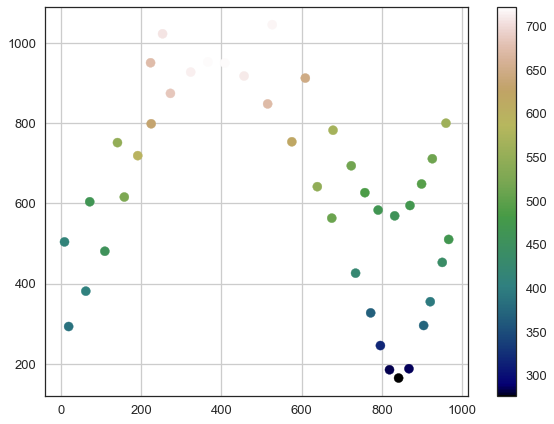

In [9]:
import matplotlib.pyplot as plt

points_xyz.plot(aspect='equal', column='Z', cmap='gist_earth', legend=True)
plt.grid()

### Extracting the vertices of the contour lines for the plotting with PyVista

In [10]:
points_mesh = gg.visualization.create_points_3d(gdf=points_xyz)
points_mesh

PolyData,Information
N Cells,41
N Points,41
X Bounds,"8.841e+00, 9.661e+02"
Y Bounds,"1.650e+02, 1.045e+03"
Z Bounds,"2.769e+02, 7.220e+02"
N Arrays,0


In [11]:
type(points_mesh)

pyvista.core.pointset.PolyData

### Plotting the Lines with PyVista

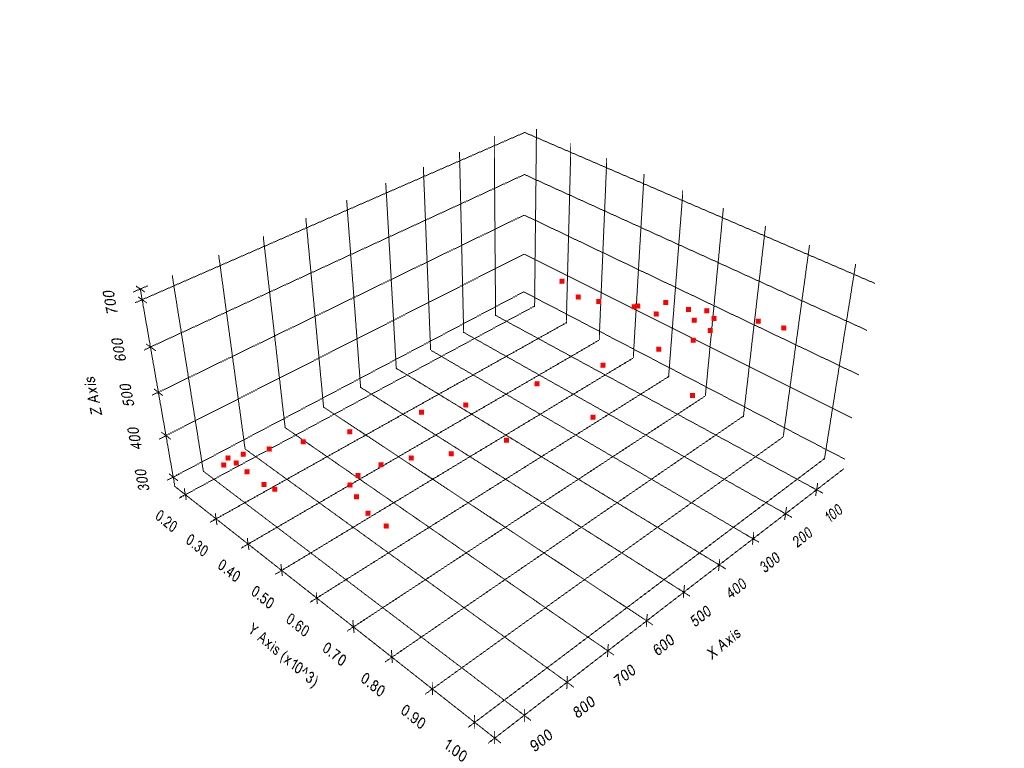

In [12]:
p = pv.Plotter()

p.add_mesh(mesh=points_mesh, color='red')

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Visualizing the DEM with PyVista

### Loading Data

The DEM is loaded as Rasterio object using rasterio.

In [13]:
import rasterio
import gemgis as gg
import pyvista as pv 
import numpy as np

dem = rasterio.open(file_path + 'topo.tif')

dem.read(1)

array([[499.90110024, 499.86421238, 499.82858152, ..., 625.37307284,
        625.78164892, 626.18920124],
       [499.53566482, 499.49887905, 499.4633306 , ..., 625.17315916,
        625.58165735, 625.98912699],
       [499.18752484, 499.15158818, 499.11692808, ..., 624.97739453,
        625.38574125, 625.79305697],
       ...,
       [411.5023835 , 411.37335931, 411.24503355, ..., 384.8252337 ,
        386.21293421, 387.56684012],
       [411.66101945, 411.5316941 , 411.40306465, ..., 384.4299191 ,
        385.80964238, 387.15718098],
       [411.82014581, 411.69052091, 411.56158939, ..., 384.04962954,
        385.42140506, 386.76248969]])

### Plotting the Data

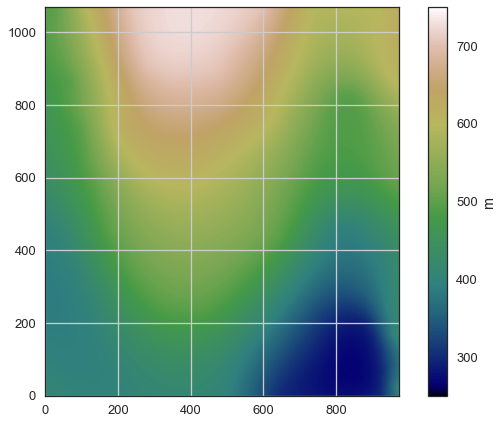

In [14]:
import matplotlib.pyplot as plt

im =plt.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
cbar = plt.colorbar(im)
cbar.set_label('m')
plt.grid()

### Converting the Rasterio object or NumPy Array into a Structured Grid

In [15]:
grid = gg.visualization.create_dem_3d(dem=np.flipud(dem.read(1)), extent=[0,972,0,1069])

grid

StructuredGrid (0x24f14f3b3a0)
  N Cells:	1037028
  N Points:	1039068
  X Bounds:	0.000e+00, 9.710e+02
  Y Bounds:	0.000e+00, 1.068e+03
  Z Bounds:	2.650e+02, 7.300e+02
  Dimensions:	1069, 972, 1
  N Arrays:	1

In [16]:
type(grid)

pyvista.core.pointset.StructuredGrid

### Plotting the Structured Grid with PyVista

The elevation information of the DEM, also called ``scalars`` are stored in the NumPy array ``grid["Elevation"]``.

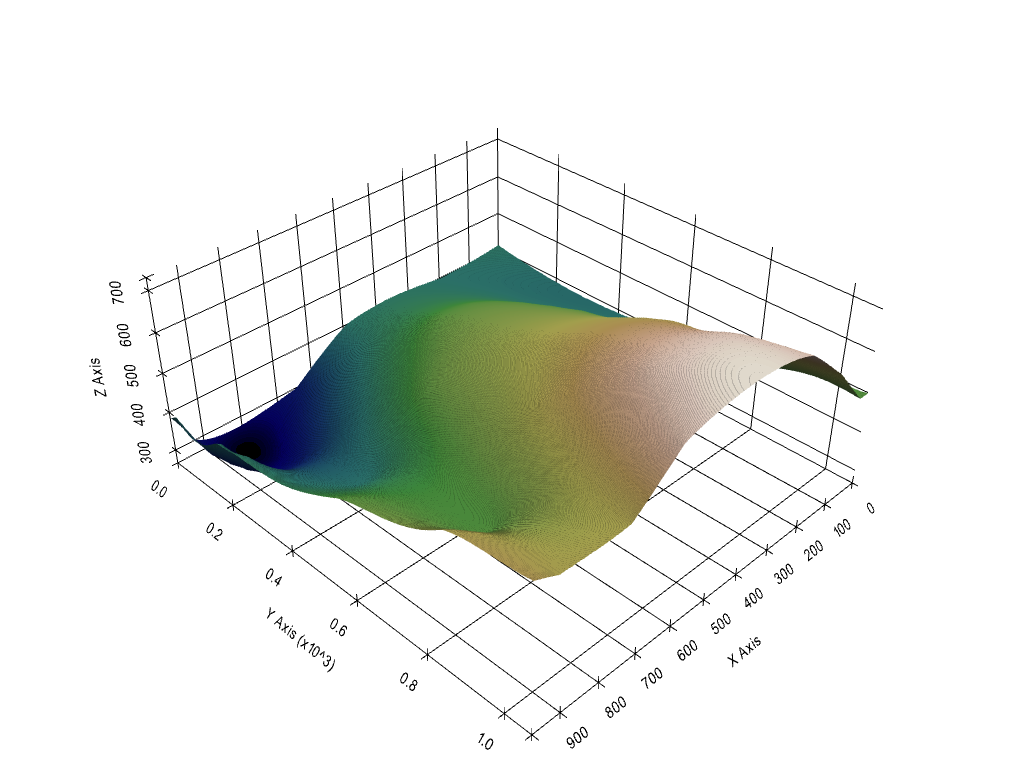

In [17]:
p = pv.Plotter()

p.add_mesh(mesh=grid, scalars=grid["Elevation"], cmap='gist_earth')
    
p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Combining everything

All datasets can also be plotted in the same plot.

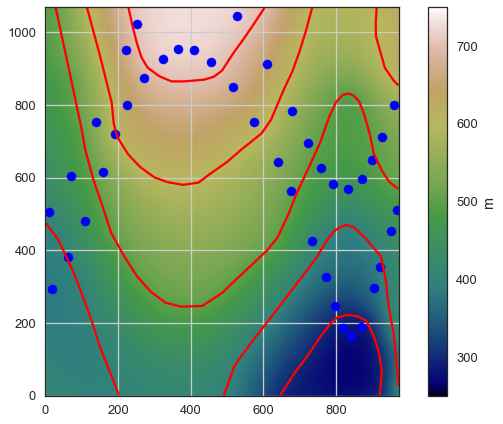

In [18]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1,1)
points_xyz.plot(ax=ax, aspect='equal', color='blue')
contours.plot(ax=ax,aspect='equal', color='red')
im =plt.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
cbar = plt.colorbar(im)
cbar.set_label('m')

plt.grid()

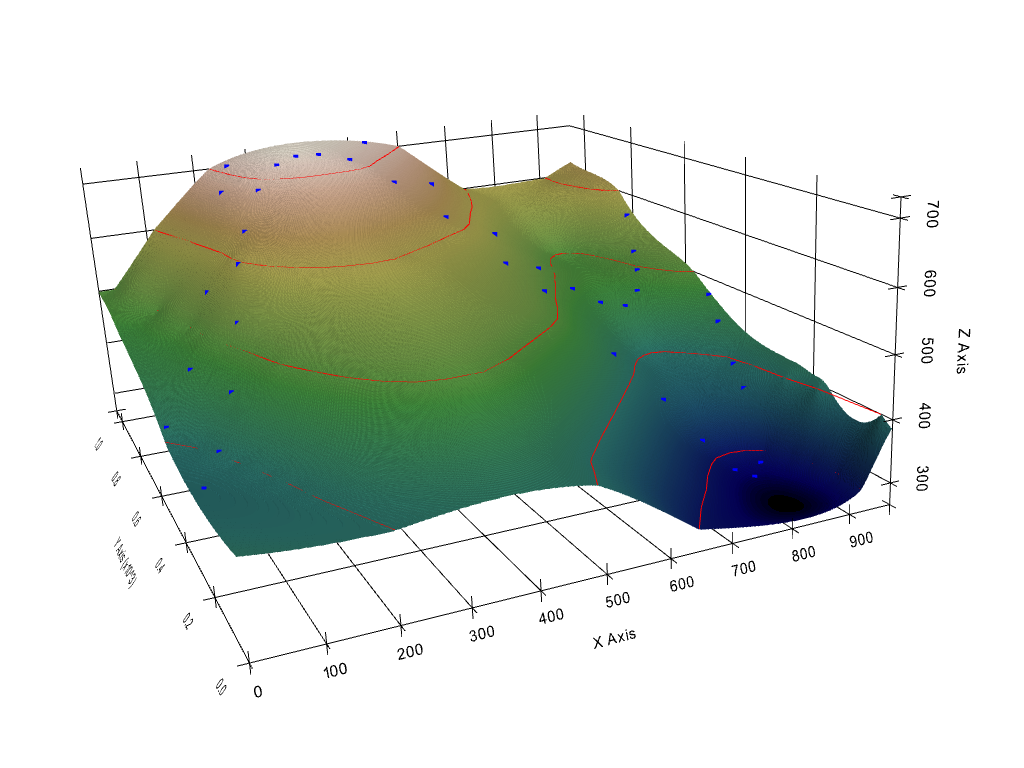

In [19]:
p = pv.Plotter()

p.add_mesh(mesh=lines, color='red')
    
p.add_mesh(mesh=points_mesh, color='blue')

p.add_mesh(mesh=grid, scalars=grid["Elevation"], cmap='gist_earth')

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]

p.set_background('white')
p.show_grid(color='black')
p.show()